In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

pd.set_option('display.max_columns', None)
import datetime, warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('df1.csv', index_col=0)
df.head()

,FlightDate,Origin,Dest,CRSDepTime,DepDelay,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Operating_Airline,DepDel15,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrivalDelayGroups,DAY,MONTH,MONTH_AB,FLIGHT_STATUS
0,2022-04-04,Grand Junction,Denver,2,-10.0,40.0,72.0,65.0,212.0,CommutAir,0.0,17.0,2,3,8.0,3,-17.0,-2.0,4,4,Apr,0
1,2022-04-04,Harlingen,Houston,2,-4.0,55.0,77.0,80.0,295.0,CommutAir,0.0,16.0,2,2,9.0,2,-1.0,-1.0,4,4,Apr,0
2,2022-04-04,Durango,Denver,3,-15.0,47.0,70.0,82.0,251.0,CommutAir,0.0,21.0,3,3,14.0,3,-3.0,-1.0,4,4,Apr,0
3,2022-04-04,Houston,Gulfport-Biloxi,3,-5.0,57.0,90.0,77.0,376.0,CommutAir,0.0,16.0,3,3,4.0,3,-18.0,-2.0,4,4,Apr,0
4,2022-04-04,Durango,Denver,2,0.0,49.0,70.0,76.0,251.0,CommutAir,0.0,19.0,2,3,8.0,3,6.0,0.0,4,4,Apr,1


In [14]:
df['FL_DATE'] = pd.to_datetime(df['FlightDate'])
df['WEEKDAY'] = df['FL_DATE'].dt.dayofweek

In [15]:
df.WEEKDAY.value_counts()


6    573511
0    569067
4    568801
3    566103
2    542552
1    540377
5    502808
Name: WEEKDAY, dtype: int64

In [16]:
df.head(3)


,FlightDate,Origin,Dest,CRSDepTime,DepDelay,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Operating_Airline,DepDel15,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrivalDelayGroups,DAY,MONTH,MONTH_AB,FLIGHT_STATUS,FL_DATE,WEEKDAY
0,2022-04-04,Grand Junction,Denver,2,-10.0,40.0,72.0,65.0,212.0,CommutAir,0.0,17.0,2,3,8.0,3,-17.0,-2.0,4,4,Apr,0,2022-04-04,0
1,2022-04-04,Harlingen,Houston,2,-4.0,55.0,77.0,80.0,295.0,CommutAir,0.0,16.0,2,2,9.0,2,-1.0,-1.0,4,4,Apr,0,2022-04-04,0
2,2022-04-04,Durango,Denver,3,-15.0,47.0,70.0,82.0,251.0,CommutAir,0.0,21.0,3,3,14.0,3,-3.0,-1.0,4,4,Apr,0,2022-04-04,0


In [18]:
df.Dest.value_counts().iloc[:20]


Chicago              203856
Atlanta              179427
New York             168241
Dallas-Fort Worth    153949
Denver               149574
Charlotte            118082
Houston              112094
Los Angeles          109249
Las Vegas             94755
Seattle               94204
Phoenix               93461
Orlando               82123
Arlington             81157
Newark                80908
Boston                75132
Detroit               73971
San Francisco         72934
Minneapolis           68748
Miami                 63522
Salt Lake City        63405
Name: Dest, dtype: int64

In [19]:
top_cities = df.Dest.value_counts().iloc[0:20].rename_axis('DEST').reset_index(name='TOTAL_FLIGHTS')
top_cities.head()

,DEST,TOTAL_FLIGHTS
0,Chicago,203856
1,Atlanta,179427
2,New York,168241
3,Dallas-Fort Worth,153949
4,Denver,149574


In [20]:
top_cities.DEST.unique()


array(['Chicago', 'Atlanta', 'New York', 'Dallas-Fort Worth', 'Denver',
       'Charlotte', 'Houston', 'Los Angeles', 'Las Vegas', 'Seattle',
       'Phoenix', 'Orlando', 'Arlington', 'Newark', 'Boston', 'Detroit',
       'San Francisco', 'Minneapolis', 'Miami', 'Salt Lake City'],
      dtype=object)

In [21]:
city_list = top_cities['DEST'].tolist()


In [22]:
city_list


['Chicago',
 'Atlanta',
 'New York',
 'Dallas-Fort Worth',
 'Denver',
 'Charlotte',
 'Houston',
 'Los Angeles',
 'Las Vegas',
 'Seattle',
 'Phoenix',
 'Orlando',
 'Arlington',
 'Newark',
 'Boston',
 'Detroit',
 'San Francisco',
 'Minneapolis',
 'Miami',
 'Salt Lake City']

In [24]:
boolean_series = df.Dest.isin(city_list)
dfm = df[boolean_series]
dfm.head()

,FlightDate,Origin,Dest,CRSDepTime,DepDelay,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Operating_Airline,DepDel15,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrivalDelayGroups,DAY,MONTH,MONTH_AB,FLIGHT_STATUS,FL_DATE,WEEKDAY
0,2022-04-04,Grand Junction,Denver,2,-10.0,40.0,72.0,65.0,212.0,CommutAir,0.0,17.0,2,3,8.0,3,-17.0,-2.0,4,4,Apr,0,2022-04-04,0
1,2022-04-04,Harlingen,Houston,2,-4.0,55.0,77.0,80.0,295.0,CommutAir,0.0,16.0,2,2,9.0,2,-1.0,-1.0,4,4,Apr,0,2022-04-04,0
2,2022-04-04,Durango,Denver,3,-15.0,47.0,70.0,82.0,251.0,CommutAir,0.0,21.0,3,3,14.0,3,-3.0,-1.0,4,4,Apr,0,2022-04-04,0
4,2022-04-04,Durango,Denver,2,0.0,49.0,70.0,76.0,251.0,CommutAir,0.0,19.0,2,3,8.0,3,6.0,0.0,4,4,Apr,1,2022-04-04,0
7,2022-04-04,Knoxville,Houston,2,-12.0,136.0,157.0,174.0,771.0,CommutAir,0.0,22.0,2,3,16.0,3,5.0,0.0,4,4,Apr,1,2022-04-04,0


In [25]:
dfm.Dest.unique()


array(['Denver', 'Houston', 'Arlington', 'Charlotte', 'Newark',
       'New York', 'Chicago', 'Las Vegas', 'Los Angeles', 'Phoenix',
       'Orlando', 'Miami', 'Atlanta', 'Minneapolis', 'Salt Lake City',
       'Boston', 'Detroit', 'San Francisco', 'Seattle',
       'Dallas-Fort Worth'], dtype=object)

In [26]:
dfm.Dest.value_counts()


Chicago              203856
Atlanta              179427
New York             168241
Dallas-Fort Worth    153949
Denver               149574
Charlotte            118082
Houston              112094
Los Angeles          109249
Las Vegas             94755
Seattle               94204
Phoenix               93461
Orlando               82123
Arlington             81157
Newark                80908
Boston                75132
Detroit               73971
San Francisco         72934
Minneapolis           68748
Miami                 63522
Salt Lake City        63405
Name: Dest, dtype: int64

In [27]:
dfm.shape

(2138792, 24)

In [28]:
df.shape

(3863219, 24)

In [29]:
dfm.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2138792 entries, 0 to 4078315
Data columns (total 24 columns):
 #   Column              Dtype         
---  ------              -----         
 0   FlightDate          object        
 1   Origin              object        
 2   Dest                object        
 3   CRSDepTime          int64         
 4   DepDelay            float64       
 5   AirTime             float64       
 6   CRSElapsedTime      float64       
 7   ActualElapsedTime   float64       
 8   Distance            float64       
 9   Operating_Airline   object        
 10  DepDel15            float64       
 11  TaxiOut             float64       
 12  WheelsOff           int64         
 13  WheelsOn            int64         
 14  TaxiIn              float64       
 15  CRSArrTime          int64         
 16  ArrDelay            float64       
 17  ArrivalDelayGroups  float64       
 18  DAY                 int64         
 19  MONTH               int64         
 20  MO

In [35]:
dfm = dfm.drop(columns=['FL_DATE','FlightDate', 'MONTH_AB','ArrivalDelayGroups'])


KeyError: "['FL_DATE', 'FlightDate', 'MONTH_AB', 'ArrivalDelayGroups'] not found in axis"

In [36]:
dfm= dfm.drop(columns=['DepDel15'])


In [37]:
dfm.shape


(2138792, 19)

In [38]:
dfm.to_csv('dfm.csv')


In [39]:
dfm.corr()


,CRSDepTime,DepDelay,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,DAY,MONTH,FLIGHT_STATUS,WEEKDAY
CRSDepTime,1.000000,0.088437,0.076904,0.074490,0.076976,0.077973,-0.009403,0.881156,0.580425,0.030987,0.628892,0.088377,0.000833,0.008168,0.147288,0.004350
DepDelay,0.088437,1.000000,0.018262,0.020862,0.025213,0.018747,0.051377,0.118487,0.048005,0.008956,0.070723,0.969836,-0.008468,0.026783,0.365815,0.028973
AirTime,0.076904,0.018262,1.000000,0.989584,0.986868,0.983266,0.063187,0.038968,0.029780,0.019582,0.041037,0.014044,-0.002735,-0.009642,0.063664,0.007546
CRSElapsedTime,0.074490,0.020862,0.989584,1.000000,0.980861,0.981790,0.084619,0.037129,0.026359,0.034495,0.040248,-0.003905,-0.002767,-0.020862,0.026023,0.008552
ActualElapsedTime,0.076976,0.025213,0.986868,0.980861,1.000000,0.968003,0.190645,0.044901,0.035863,0.120222,0.045556,0.047985,-0.003817,-0.012931,0.115451,0.009518
Distance,0.077973,0.018747,0.983266,0.981790,0.968003,1.000000,0.046302,0.033439,0.020324,0.015675,0.032873,0.000721,-0.000968,0.000827,0.036544,0.009622
TaxiOut,-0.009403,0.051377,0.063187,0.084619,0.190645,0.046302,1.000000,0.027358,0.015187,0.025515,0.007799,0.181654,-0.002322,-0.038589,0.273807,0.005116
WheelsOff,0.881156,0.118487,0.038968,0.037129,0.044901,0.033439,0.027358,1.000000,0.653125,0.034458,0.671904,0.123951,-0.000745,0.001576,0.183331,0.005118
WheelsOn,0.580425,0.048005,0.029780,0.026359,0.035863,0.020324,0.015187,0.653125,1.000000,0.049548,0.879247,0.058138,-0.001256,-0.013642,0.125349,-0.000617
TaxiIn,0.030987,0.008956,0.019582,0.034495,0.120222,0.015675,0.025515,0.034458,0.049548,1.000000,0.045764,0.115466,-0.008702,0.013961,0.190461,0.015319


In [40]:
abs(dfm.corr())>.75


,CRSDepTime,DepDelay,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,DAY,MONTH,FLIGHT_STATUS,WEEKDAY
CRSDepTime,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
DepDelay,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
AirTime,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False
CRSElapsedTime,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False
ActualElapsedTime,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False
Distance,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False
TaxiOut,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
WheelsOff,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
WheelsOn,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
TaxiIn,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


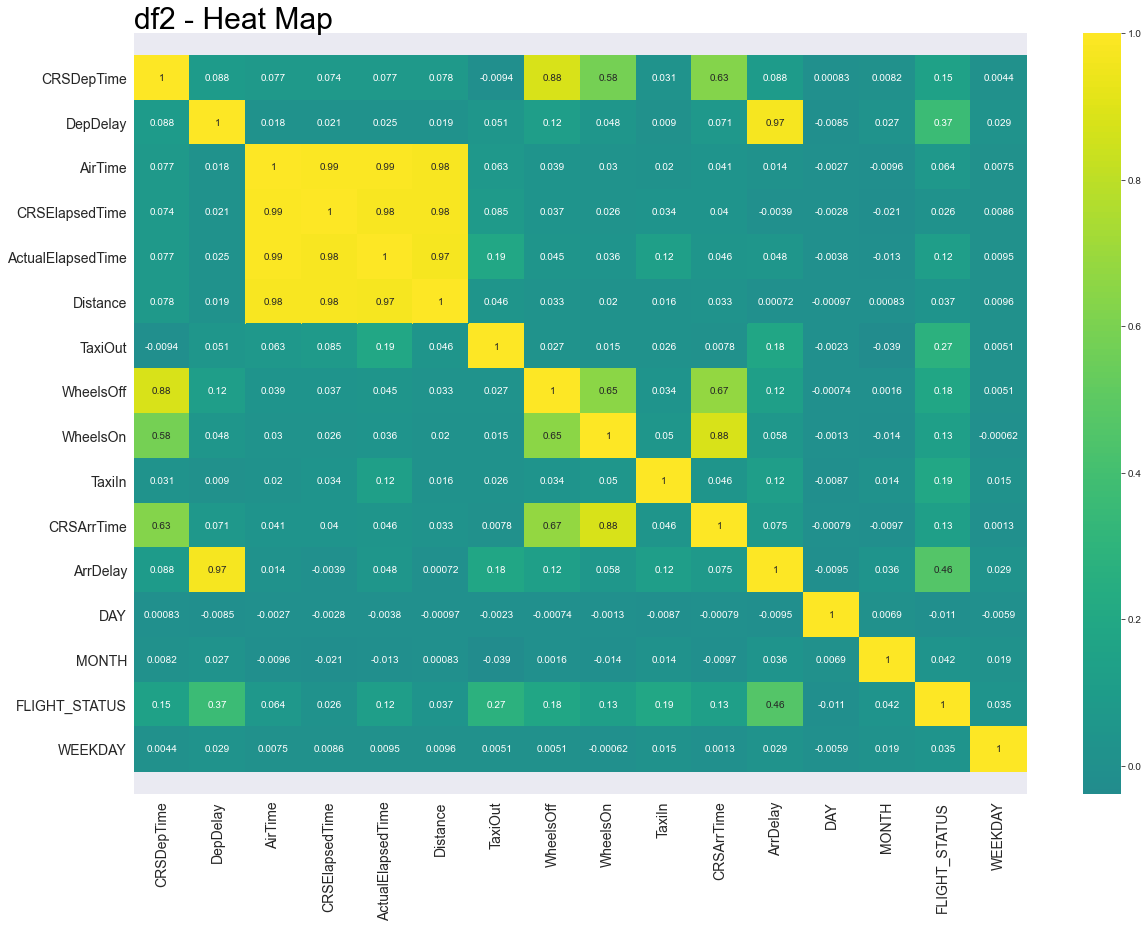

In [41]:
plt.figure(figsize=(20,14))
ax = sns.heatmap(dfm.corr(), cmap='viridis', center=0, annot=True)
bottom, top = ax.get_ylim()
plt.text(0,-0.6, "df2 - Heat Map", fontsize = 30, color='Black', fontstyle='normal')
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

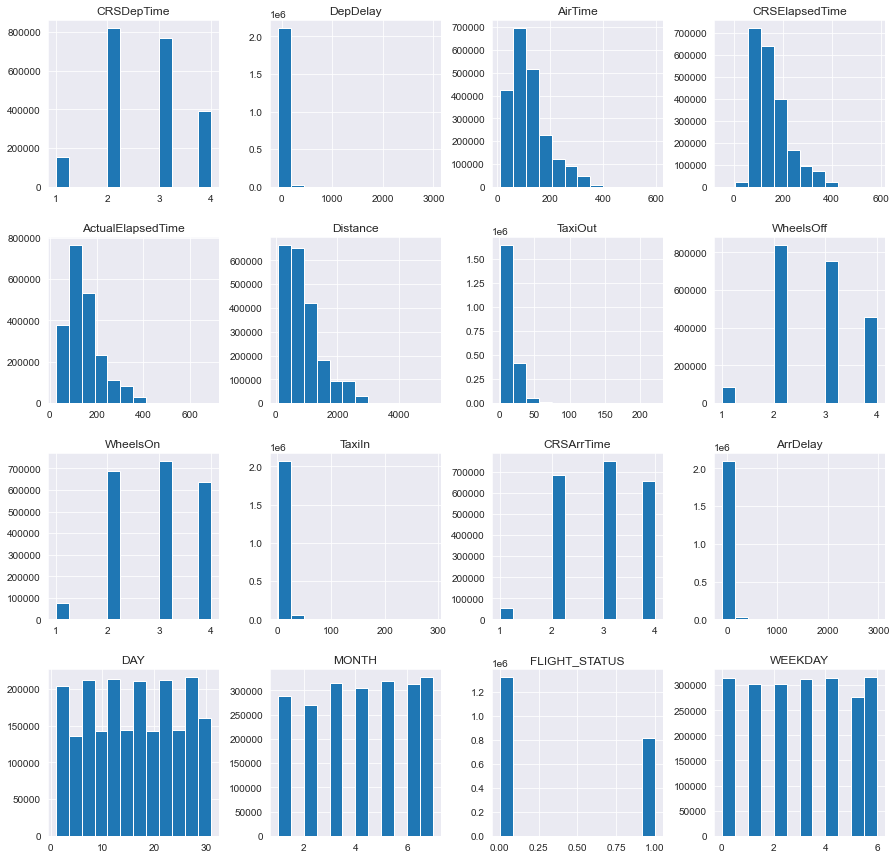

In [42]:
dfm.hist(figsize  = [15, 15],bins=12) 
plt.show()

In [43]:
dfm_jan = dfm[(dfm['MONTH'] == 1)]
dfm_jan.head()

,Origin,Dest,CRSDepTime,DepDelay,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Operating_Airline,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,DAY,MONTH,FLIGHT_STATUS,WEEKDAY
2924041,Ft. Lauderdale,Atlanta,4,-2.0,83.0,116.0,106.0,581.0,Delta Airlines,13.0,4,4,10.0,4,-12.0,6,1,0,3
2924044,Jackson,Atlanta,3,-7.0,49.0,81.0,65.0,341.0,Delta Airlines,11.0,3,3,5.0,3,-23.0,6,1,0,3
2924045,Richmond,Atlanta,2,-3.0,80.0,110.0,101.0,481.0,Delta Airlines,13.0,2,2,8.0,2,-12.0,6,1,0,3
2924048,Raleigh,Atlanta,3,-3.0,67.0,91.0,83.0,356.0,Delta Airlines,12.0,3,3,4.0,4,-11.0,6,1,0,3
2924049,Nashville,Atlanta,2,-5.0,39.0,69.0,63.0,214.0,Delta Airlines,18.0,2,2,6.0,2,-11.0,6,1,0,3


In [44]:
dfm_jan.MONTH.value_counts()


1    287857
Name: MONTH, dtype: int64

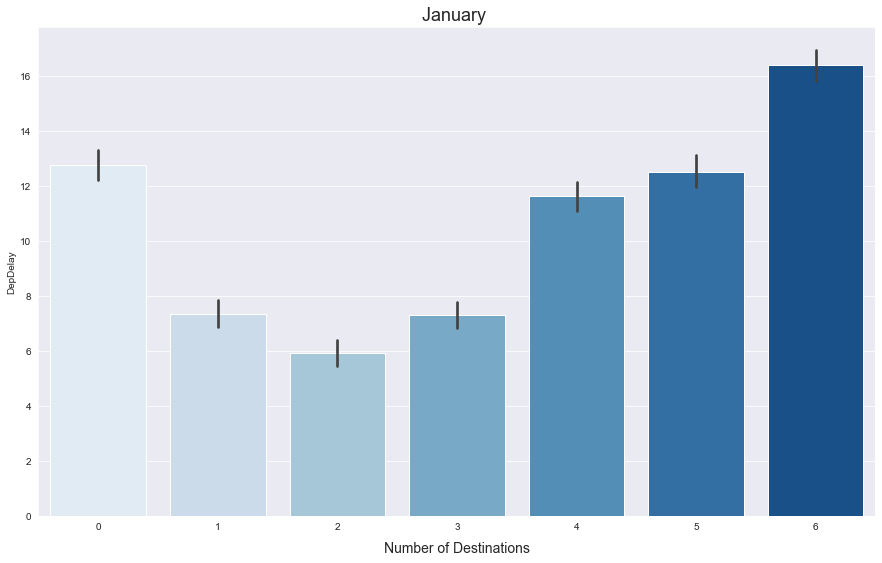

In [46]:
sns.set_style('darkgrid')

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="WEEKDAY", y="DepDelay", data=dfm_jan, palette="Blues")
plt.title('January ', fontsize=18)
plt.xlabel('Number of Destinations', fontsize=14, labelpad=10);
plt.show()